# Termpaper G9
*names
---

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# MapCode for investigated regions in Norway and Germany respectively -"NO2", "DE_LU"
# Go through all csv files and extract the data for the only the selected regions in the folder data/DayAheadPrices_12.1.D and add to a dataframe
# The data is from 2019-2023 and named as YYYY_MM_DayAheadPrices_12.1.D.csv
data_path = "data/DayAheadPrices_12.1.D"
regions = ["NO2", "DE_LU"]
csv_sep = "	"
start_year, end_year = 2019, 2023
keep_columns = ["DateTime", "ResolutionCode", "MapCode", "Price"]

def read_csv(region):
    data = pd.DataFrame()
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            file_path = f"{data_path}/{year}_{month:02d}_DayAheadPrices_12.1.D.csv"
            try:
                df = pd.read_csv(file_path, sep=csv_sep)
                df = df.loc[df["MapCode"] == region]
                data = pd.concat([data, df])
            except FileNotFoundError:
                pass
    return data

df_dap = pd.DataFrame()
for region in regions:
    df_dap = pd.concat([df_dap, read_csv(region)], ignore_index=True)[keep_columns]
df_dap.head()

# Split only to hourly and convert to datetime object
df_hourly = df_dap.loc[df_dap["ResolutionCode"] == "PT60M"].copy()
df_hourly['DateTime'] = pd.to_datetime(df_hourly['DateTime'])
df_hourly.head()


,DateTime,ResolutionCode,MapCode,Price
0,2019-01-01 00:00:00,PT60M,NO2,49.25
1,2019-01-01 01:00:00,PT60M,NO2,49.17
2,2019-01-01 02:00:00,PT60M,NO2,48.37
3,2019-01-01 03:00:00,PT60M,NO2,47.19
4,2019-01-01 04:00:00,PT60M,NO2,47.37


## Task 1


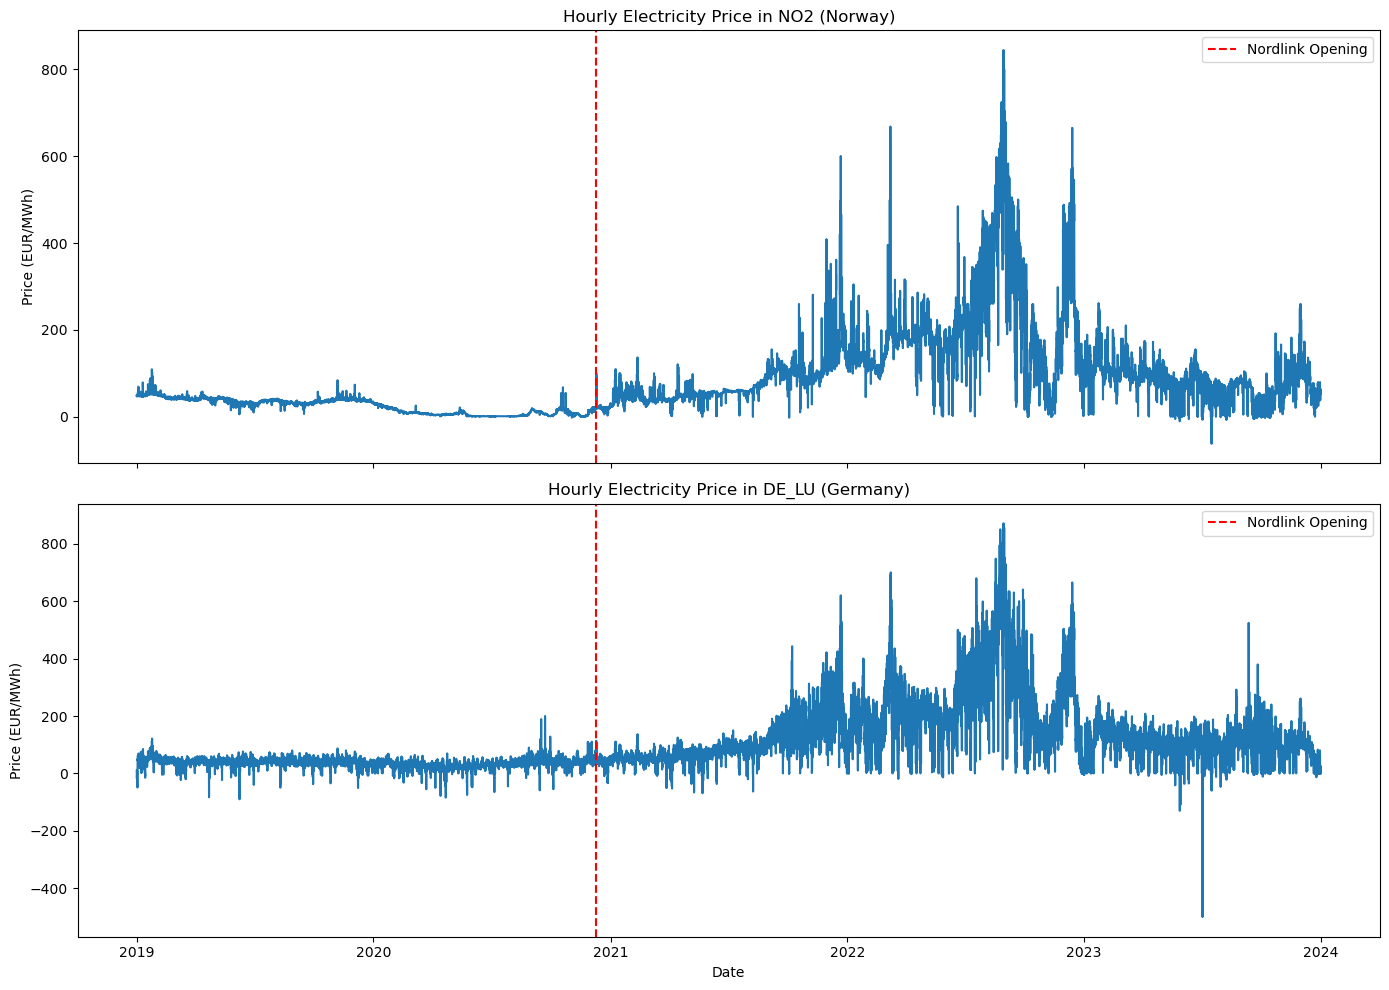

In [9]:
# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot for NO2 region
sns.lineplot(data=df_hourly[df_hourly['MapCode'] == 'NO2'], x='DateTime', y='Price', ax=ax1)
ax1.axvline(pd.Timestamp("2020-12-09"), color='red', linestyle='--', label='Nordlink Opening')
ax1.set_title("Hourly Electricity Price in NO2 (Norway)")
ax1.set_ylabel("Price (EUR/MWh)")
ax1.legend()

# Plot for DE_LU region
sns.lineplot(data=df_hourly[df_hourly['MapCode'] == 'DE_LU'], x='DateTime', y='Price', ax=ax2)
ax2.axvline(pd.Timestamp("2020-12-09"), color='red', linestyle='--', label='Nordlink Opening')
ax2.set_title("Hourly Electricity Price in DE_LU (Germany)")
ax2.set_ylabel("Price (EUR/MWh)")
ax2.legend()

# Finalize and save the figure
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("figure_task1.png")
plt.show()


In [18]:
df_hourly['Year'] = df_hourly['DateTime'].dt.year

stats_df = df_hourly.groupby(['Year', 'MapCode']).agg(
    Mean=('Price', 'mean'),
    Median=('Price', 'median'),
    Std_Dev=('Price', 'std'),
    Min=('Price', 'min'),
    Max=('Price', 'max')
).round(2)

# Save the result to an Excel file
stats_df.to_excel("table_task2.xlsx")

# Display the first few rows to verify
print(stats_df)

                Mean  Median  Std_Dev     Min     Max
Year MapCode                                         
2019 DE_LU     37.67   38.06    15.52  -90.01  121.46
     NO2       39.26   38.81     8.23    5.86  109.45
2020 DE_LU     30.47   30.99    17.50  -83.94  200.04
     NO2        9.29    6.95     8.26   -1.73   99.92
2021 DE_LU     96.85   75.48    73.68  -69.00  620.00
     NO2       75.11   59.34    47.22   -1.97  600.16
2022 DE_LU    235.44  208.34   142.82  -19.04  871.00
     NO2      211.28  181.13   125.85    0.04  844.00
2023 DE_LU     95.18   98.02    47.58 -500.00  524.27
     NO2       79.44   80.46    36.28  -61.84  261.85
